In [1]:
import numpy as np
import numpy.linalg as linalg

import os
import glob
#import operator

import PIL
from PIL import Image

import scipy
from scipy import misc,spatial

In [2]:
trainimages = sorted(glob.iglob('./data/eigenfaces/training/*.pgm'))
def getid(fname):
    return int(os.path.basename(fname)[7:9])
fileids = map(getid,trainimages)
im = PIL.Image.open(trainimages[1])
iiii = scipy.misc.imresize(im,50)
np.ravel(iiii)

array([255, 255, 255, ..., 240, 253, 254], dtype=uint8)

In [52]:
teat = np.arange(1,10)
print teat
teat = np.reshape(teat,(3,3))
print teat
np.mean(teat,axis=0)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([ 4.,  5.,  6.])

In [71]:
trainnames = sorted(glob.iglob('./data/eigenfaces/training/*.pgm'))
trainids = map(getid,trainnames)

testnames = sorted(glob.iglob('./data/eigenfaces/test/*.pgm'))
testids = map(getid, testnames)

eigf = Eig()
eigf.train(trainnames, trainids)
eigf.test(testnames, testids)

[6, 1, 2, 1, 2, 3, 3, 8, 14, 4, 14, 4, 12, 5, 9, 5, 6, 6, 2, 6, 6, 7, 7, 7, 3, 8, 2, 8, 9, 9, 3, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 1, 12, 12, 13, 7, 14, 14, 4, 14, 2, 3, 15, 15, 15]
[1, 1, 1, 1, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15]
0.709090909091


In [70]:
class Eig(object):
    def train(self, trainfilenames, fileids):
        flag = 0
        self.trainid = fileids
        # creating the training matrix
        for path in trainfilenames:
            trainimg = PIL.Image.open(path)
            trainimg = scipy.misc.imresize(trainimg,50)
            ravelimg = np.ravel(trainimg)
            if flag == 0:
                trainmatrix = ravelimg
                flag = flag +1
            else:
                trainmatrix = np.vstack((trainmatrix, ravelimg))
        # start PCA
        self.trainaverageimg = np.mean(trainmatrix, axis=0)
        submeantrainimg = trainmatrix - self.trainaverageimg
        U,D,V = np.linalg.svd(submeantrainimg.T)
        self.eigenfaces = U[:,0:5]
        trainweights = np.dot(submeantrainimg, self.eigenfaces)
        self.tree = spatial.cKDTree(trainweights)
        
    def test(self, testfilenames, testids):
        correctmatch = 0
        tmpaverageimg = self.trainaverageimg
        bestmatchidlist = list()
        matchrate = 0
        
        for img in testfilenames:
            testimg = PIL.Image.open(img)
            restestimg = misc.imresize(testimg, 50)
            raveltest = np.ravel(restestimg)
            subtestimg = raveltest - tmpaverageimg
            testimgweight = np.dot(subtestimg, self.eigenfaces)
            distance, bestmatch = self.tree.query(testimgweight)
            bestmatchid = self.trainid[bestmatch]
            bestmatchidlist.append(bestmatchid)
        print bestmatchidlist
        print testids
        for (t,m) in zip(testids, bestmatchidlist):
            if t == m:
                matchrate = matchrate + 1
        print (matchrate * 1./len(testids))

In [2]:
%matplotlib inline

# Getting Help

In [3]:
from pylab import *
#lookfor('hstack')

# Plotting

# Loading Images

In [4]:
import os
import glob
import operator


#Loading the Training dataset images
#training_image_filenames = sorted(glob.iglob('./data/training/*.pgm'))
training_image_filenames = sorted(glob.iglob('./data/eigenfaces/training/*.pgm'))

#Loading the Test dataset images
test_image_filenames = sorted(glob.iglob('./data/eigenfaces/test/*.pgm'))

#creating a Lambda function to extract the filename
#the filename of the image is the subject id
subject_number = lambda filename: int(os.path.basename(filename)[7:9])

#extracting the filename using the lambda function
train_subject_ids = list (map(subject_number, training_image_filenames))
test_subject_ids = list (map(subject_number, test_image_filenames))

print (test_subject_ids)
'''
face_recognition = FaceRecognition()

face_recognition.enroll_faces(training_image_filenames, train_subject_ids)
recognized_ids = face_recognition.recognize_faces(test_image_filenames)

different_results = np.array(test_subject_ids) - np.array(recognized_ids)
print (different_results)
positives = (different_results == 0).sum()

assert positives >= 41
'''

[1, 1, 1, 1, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 15]


'\nface_recognition = FaceRecognition()\n\nface_recognition.enroll_faces(training_image_filenames, train_subject_ids)\nrecognized_ids = face_recognition.recognize_faces(test_image_filenames)\n\ndifferent_results = np.array(test_subject_ids) - np.array(recognized_ids)\nprint (different_results)\npositives = (different_results == 0).sum()\n\nassert positives >= 41\n'

In [4]:
# for showing the images
from PIL import Image as pim

(128, 170)


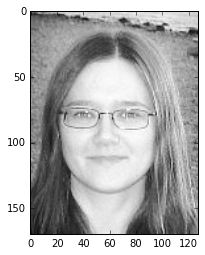

In [17]:
img2 = pim.open('pic/x.jpg')
print img2.size

# Converting to grayscale
imggray = img2.convert('LA')

plt.figure(figsize=(4, 4))
plt.imshow(imggray)

In [ ]:
#Converting to numpy matrix
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(4,4))
plt.imshow(imgmat, cmap='gray');

# Eigenfaces

# loading CSV file

In [16]:
d = np.genfromtxt('planedata.csv',delimiter=',')
x = d[0]
y = d[1]
z = d[2]

In [76]:
#load data from a npy file
np.load("test.npy")

array([[ 0.34745711,  0.44004517,  0.72944635,  0.8454958 ,  0.53844583,
         0.66106731,  0.8567587 ,  0.02729644,  0.6442586 ,  0.97493222],
       [ 0.02949181,  0.63615855,  0.99905642,  0.29872585,  0.15823535,
         0.22952272,  0.85921773,  0.00908835,  0.51469946,  0.56063438],
       [ 0.38580252,  0.43961741,  0.37287846,  0.90596154,  0.46931807,
         0.5218421 ,  0.17140406,  0.87579783,  0.7845141 ,  0.26633588],
       [ 0.58763275,  0.47368359,  0.44304322,  0.01899987,  0.04438416,
         0.67896108,  0.83790768,  0.87546436,  0.21461652,  0.00117566],
       [ 0.9982011 ,  0.50540716,  0.91003877,  0.27419578,  0.37993117,
         0.56627065,  0.99072382,  0.60706445,  0.81991132,  0.04674462]])

# Getting max and min of an array for curve fitting

In [6]:
xargmax = np.argmax(x)
xmax = x[4700]
print xargmax, ' ',xmax

xmax2 = np.max(x)
xmax2

4700   99.9910947729


99.991094772941196

# Plotting

In [77]:
import matplotlib.pyplot as plt
#3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

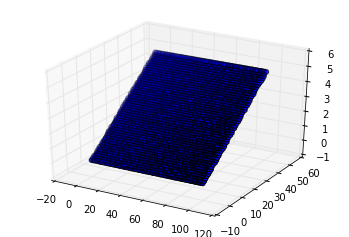

In [8]:
# scatter 3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x,y,z)
plt.show()

# Curvefitting
Eigenvalues and point clouds must also be read

http://docs.sympy.org/0.7.2/modules/physics/mechanics/api/essential.html

In [ ]:
# assignment old answer
def svd_solver(A, b):
    
    U, s, V = np.linalg.svd(A)
    print U.shape 
    
    inv = np.dot((V.T).dot(np.diag(s**(-1))), U[:,:2].T)
    x = np.dot(inv, b)
    
    return x

def compute_parallel_lines(first_line, second_line):
    # reading data files 
    data1 = np.load(first_line)
    data2 = np.load(second_line)
    
    # extract x and y from the raw data
    l1_x = data1[:,0]
    l1_y = data1[:,1]
    
    l2_x = data2[:,0]
    l2_y = data2[:,1]
    
    # adding one column of 1 to both lines x
    l1_A = np.column_stack((l1_x, np.ones(len(l1_x))))
    l2_A = np.column_stack((l2_x, np.ones(len(l2_x))))
    
    # calculating slope and intercepte of both lines
    l1_m, l1_c = svd_solver(l1_A, l1_y)
    l2_m, l2_c = svd_solver(l2_A, l2_y)
    
    print('Slope and Intercept of first line : ', l1_m, l1_c)
    print('Slope and Intercept of first line : ', l2_m, l2_c)
    
    plt.plot(l1_x, l1_m*l1_x+l1_c, 'o', label = 'First fitted line')
    plt.plot(l2_x, l2_m*l2_x+l2_c, 'r', label = 'Second fitted line')
    plt.legend()
    plt.show()

#loading data for lines
line1 = 'data/P1.npy'
line2 = 'data/Q1.npy'

# calling tne function
compute_parallel_lines(line1, line2)

## plot a plane with normal vector and one point

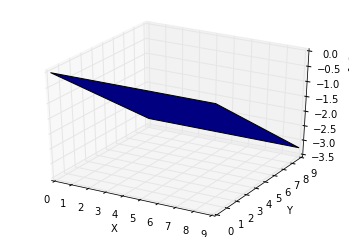

In [156]:
#point  = np.array([1, 2, 3])
#normal = np.array([1, 0.5, 2])
point  = planepoint
#normal = vec
normal = newnormvec

# a plane is a*x+b*y+c*z+d=0
# [a,b,c] is the normal. Thus, we have to calculate
# d and we're set
d = -point.dot(normal)

# create x,y
xx, yy = np.meshgrid(range(10), range(10))

# calculate corresponding z
zzz = (normal[0] * xx + normal[1] * yy - d) * 1. /normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, zzz)
plt3d.set_xlabel('X')
plt3d.set_ylabel('Y')
plt.show()

# Curve fitting the plane and rotating it

In [155]:
# steps:
# 1. curve fitting the plane
# 2. calculating the normal vector
# 3. calculating the difference between the normal vector and Z vector(0,0,1)
# 4. rotating the normal vector
# 5. draw the plane with the new normal vector

# 1. curve fitting the plane
planepoint = np.array([[x[1], y[1], z[1]]])
planeA = np.column_stack((x,y))
planeA = np.column_stack((planeA , np.ones(len(planeA))))
normvec = np.linalg.lstsq(planeA,z)
vec = normvec[0]


# 2. calculating the normal vector
# this is just "vec" in the last part

# 3. calculating the difference between the normal vector and Z vector[0,0,1]
zvec = [0,0,1]
cos_angle = np.dot(vec, zvec) / (norm(vec) * norm(zvec))
differ = arccos(cos_angle)
#differ = np.radians(differ)
print differ
print np.radians(differ)

# 4. rotating the normal vector
rx = np.array([[1, 0 , 0],
               [0, math.cos(differ), -math.sin(differ)],
               [0, math.sin(differ), math.cos(differ)]])
rz = np.array([[math.cos(differ), -math.sin(differ), 0],
               [math.sin(differ), math.cos(differ), 0],
               [0, 0, 1]])

ry = np.array([[math.cos(differ),0, math.sin(differ)],
               [0, 1, 0],
               [-math.sin(differ), 0, math.cos(differ)]])

#newnormvec = np.dot(rx,vec)
# 5. draw the plane with the new normal vector

print vec
newnormvec = np.dot(ry,vec)
newnormvec = newnormvec/norm(newnormvec)
print newnormvec

1.57079632679
0.0274155677808
[  2.78471750e-17   1.00000000e-01   1.13568860e-16]
[  1.13568860e-15   1.00000000e+00  -2.78471750e-16]


## Curve fitting Sphere

In [15]:
#	fit a sphere to X,Y, and Z data points
#	returns the radius and center points of
#	the best fit sphere
def sphereFit(spX,spY,spZ):
    #   Assemble the A matrix
    spX = np.array(spX)
    spY = np.array(spY)
    spZ = np.array(spZ)
    A = np.zeros((len(spX),4))
    A[:,0] = spX*2
    A[:,1] = spY*2
    A[:,2] = spZ*2
    A[:,3] = 1
    
    #   Assemble the f matrix
    f = np.zeros((len(spX),1))
    f[:,0] = (spX*spX) + (spY*spY) + (spZ*spZ)
    C, residules, rank, singval = np.linalg.lstsq(A,f)

    #   solve for the radius
    t = (C[0]*C[0])+(C[1]*C[1])+(C[2]*C[2])+C[3]
    radius = math.sqrt(t)
    
    return radius, C[0], C[1], C[2]

# ODE

In [22]:
# Chapter 3 File

# Frames